In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [96]:
mnist = torchvision.datasets.MNIST('.',train=True)

In [97]:
print(mnist.train_data.shape,mnist.train_labels.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])


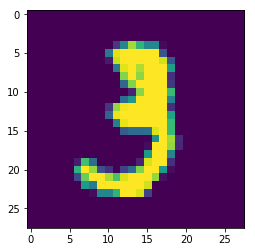

In [101]:
plt.imshow(mnist.train_data[10])

In [28]:
flat_mnist = mnist.train_data.view(-1,mnist.train_data.shape[1]*mnist.train_data.shape[2])
print(flat_mnist.shape)

torch.Size([60000, 784])


In [81]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return F.softmax(x,dim=1)
net = SimpleNet()
print(net)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [82]:
mean_x = torch.mean(flat_mnist.float())
std_x = torch.std(flat_mnist.float())
train_data = (flat_mnist.float()-mean_x)/std_x

In [83]:
import numpy as np
indexes = np.random.randint(0,train_data.shape[0],10)
print(indexes)

[42073 43266 25569 24093 49883 45297 50385  4315 51966 31669]


In [99]:
optimizer = optim.SGD(net.parameters(),0.0001)
errors = []
net.train()
for i in range(3000):
    indexes = torch.LongTensor(np.random.randint(0,train_data.shape[0],100))
    data, target = Variable(train_data[indexes]), Variable(mnist.train_labels[indexes].long())
    optimizer.zero_grad()
    output = net(data)
    loss = F.nll_loss(output, target, size_average=False)
    errors.append(loss.data[0])
    loss.backward()
    optimizer.step()

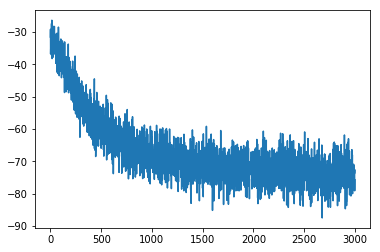

In [100]:
plt.plot(errors)

Проверить результат на test

In [98]:
mnist_test = torchvision.datasets.MNIST('.',train=False)

Изменить learning rate, архитектуру